In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

print(f"TensorFlow Version: {tf.__version__}")

TensorFlow Version: 2.18.0


In [ ]:
# --- 1. Load and Prepare the CIFAR-10 Dataset ---
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
# Convert labels to one-hot encoding (e.g., 2 -> [0,0,1,0,0,0,0,0,0,0])
# This is needed for 'categorical_crossentropy' loss
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

In [ ]:
# Define class names for visualization
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

print(f"x_train shape: {x_train.shape}")
print(f"y_train_one_hot shape: {y_train_one_hot.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test_one_hot shape: {y_test_one_hot.shape}")

x_train shape: (50000, 32, 32, 3)
y_train_one_hot shape: (50000, 10)
x_test shape: (10000, 32, 32, 3)
y_test_one_hot shape: (10000, 10)


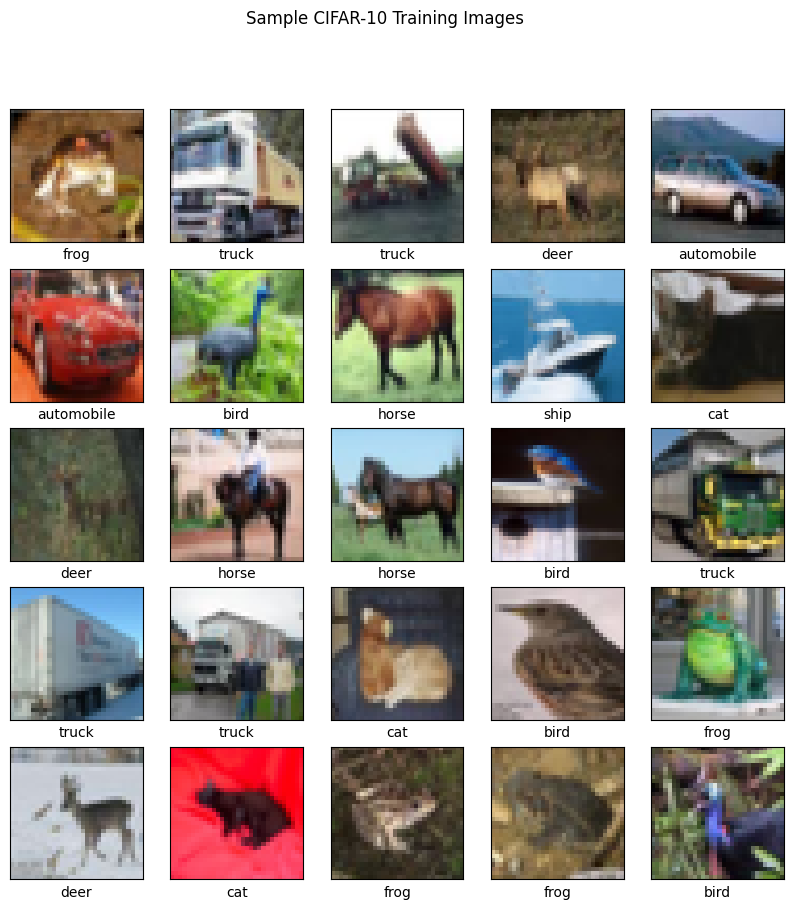

In [ ]:
# --- Optional: Visualize some training images ---
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    # The CIFAR labels are arrays, so we need to get the actual class index
    plt.xlabel(class_names[np.argmax(y_train_one_hot[i])])
plt.suptitle("Sample CIFAR-10 Training Images")
plt.show()

In [ ]:
# --- 2. Define the CNN Architecture ---
model = models.Sequential([
    # Convolutional Block 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'),
    layers.BatchNormalization(), # Added for stability and faster training
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25), # Dropout to reduce overfitting

    # Convolutional Block 2
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
     # Flatten the 3D feature maps to 1D vector
    layers.Flatten(),

    # Fully Connected Layers (Dense)
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5), # More aggressive dropout for the dense layers
    layers.Dense(10, activation='softmax') # Output layer: 10 classes, softmax for probabilities
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Display the model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,171,178 (8.28 MB)

 Trainable params: 2,169,770 (8.28 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [ ]:
# --- 3. Compile the Model ---
model.compile(optimizer='adam',
              loss='categorical_crossentropy', # Use categorical_crossentropy for one-hot encoded labels
              metrics=['accuracy'])

In [ ]:
# --- 4. Train the Model ---
# Optional: Data Augmentation for better generalization
# This creates new variations of your training images on the fly
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1,
)
datagen.fit(x_train)

print("\nStarting model training...")
history = model.fit(datagen.flow(x_train, y_train_one_hot, batch_size=64),
                    epochs= 5, # You might need more epochs for higher accuracy
                    validation_data=(x_test, y_test_one_hot),
                    verbose=1)


Starting model training...
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 341s 436ms/step - accuracy: 0.8153 - loss: 0.5328 - val_accuracy: 0.8039 - val_loss: 0.6058
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 333s 426ms/step - accuracy: 0.8163 - loss: 0.5242 - val_accuracy: 0.8351 - val_loss: 0.5021
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 335s 428ms/step - accuracy: 0.8227 - loss: 0.5083 - val_accuracy: 0.8224 - val_loss: 0.5504
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 324s 414ms/step - accuracy: 0.8213 - loss: 0.5137 - val_accuracy: 0.8406 - val_loss: 0.4785
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 324s 414ms/step - accuracy: 0.8202 - loss: 0.5137 - val_accuracy: 0.8115 - val_loss: 0.5921


In [ ]:
# --- 5. Evaluate the Model ---
print("\nEvaluating model on test data...")
test_loss, test_accuracy = model.evaluate(x_test, y_test_one_hot, verbose=2)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Evaluating model on test data...
313/313 - 13s - 43ms/step - accuracy: 0.8115 - loss: 0.5921
Test Loss: 0.5921
Test Accuracy: 0.8115


In [ ]:
# --- 6. Plot Training History ---
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

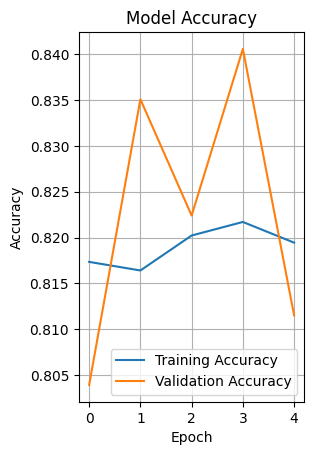

In [ ]:
#Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

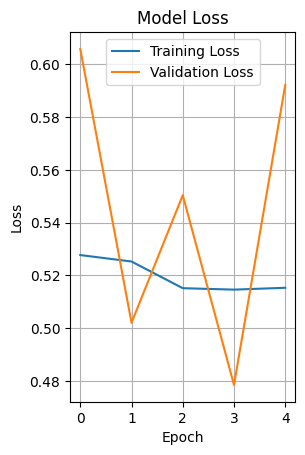

In [ ]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
# --- 7. Make and Visualize Predictions ---
print("\nMaking predictions on a sample of test images...")
predictions = model.predict(x_test)


Making predictions on a sample of test images...
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step


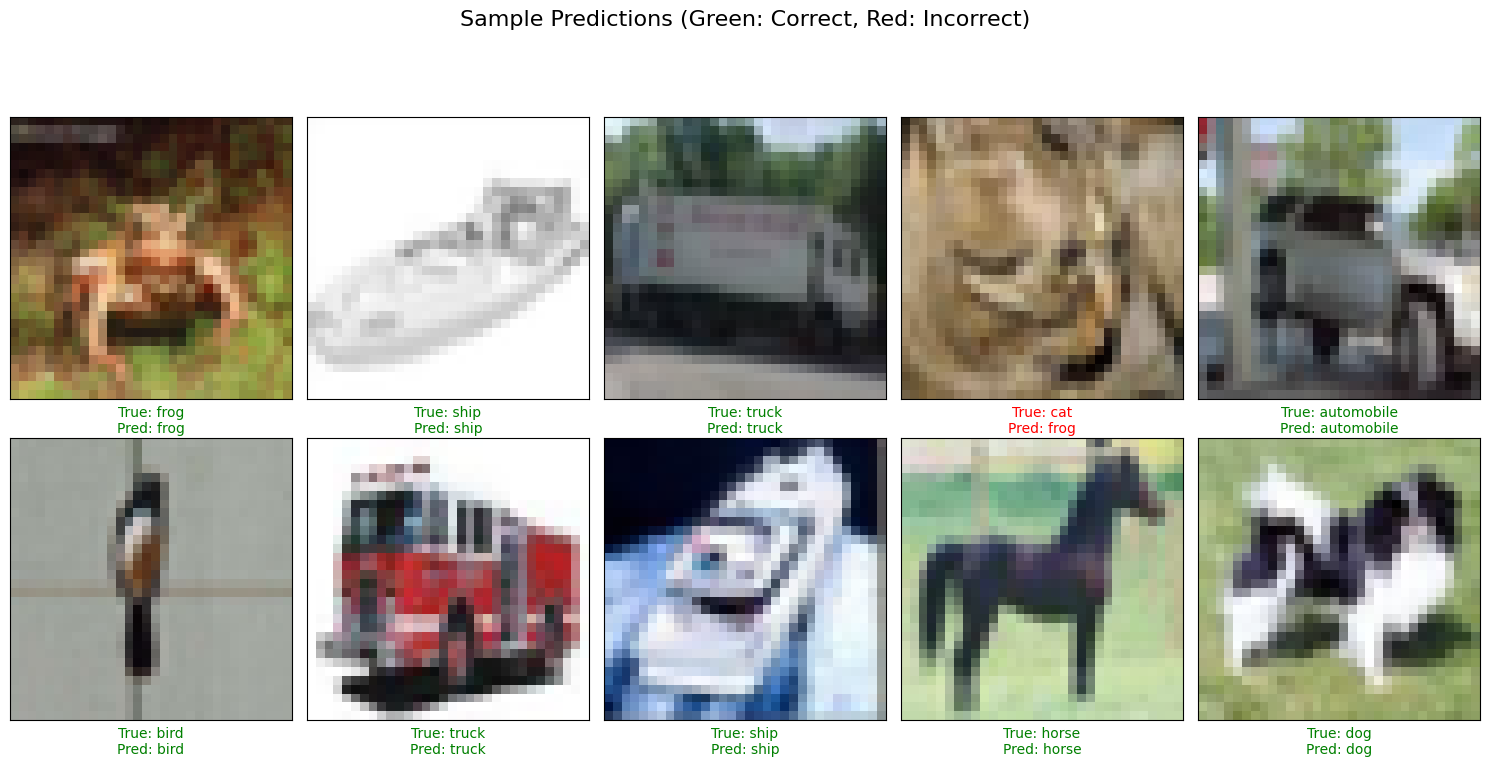

In [ ]:
# Select a few random images from the test set
num_display_images = 10
random_indices = np.random.choice(x_test.shape[0], num_display_images, replace=False)
plt.figure(figsize=(15, 8))
for i, idx in enumerate(random_indices):
    plt.subplot(2, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[idx])

    true_label = class_names[np.argmax(y_test_one_hot[idx])]
    predicted_label = class_names[np.argmax(predictions[idx])]

    color = 'green' if predicted_label == true_label else 'red'
    plt.xlabel(f"True: {true_label}\nPred: {predicted_label}", color=color)
plt.suptitle("Sample Predictions (Green: Correct, Red: Incorrect)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

In [ ]:
# --- Optional: Save the trained model ---
model.save('cifar10_cnn_model.h5')
print("\nModel saved to cifar10_cnn_model.h5")

# --- Optional: Load the model later ---
# loaded_model = models.load_model('cifar10_cnn_model.h5')
# print("\nModel loaded successfully.")


Model saved to cifar10_cnn_model.h5
